# Business context and objective 

Build a machine learning algorithm that automatically suggests the right product prices using product features and text description.

Kaggle Link : https://www.kaggle.com/c/mercari-price-suggestion-challenge/overview

![image-5.png](attachment:image-5.png)

## Translating into Data Science approach


Task ask you to build an algorithm that automatically suggests the right product prices. 
You’ll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

![image.png](attachment:image.png) 

Given the target variable is numerical in nature, we need to build the regression model to predict the price of these products using various features.

![image-2.png](attachment:image-2.png)

# Introduction

* What Price prediction? 
* Why Price prediction? 
* Why we are using this dataset for this problem? 
* Algorithms used to solve this problem

* Price prediction is trying to determine the value of a product using product features.
* The successful prediction of a product price could yield significant profit.
* The dataset used for this problem is a open sourse dataset which is avalable online. It has all the features which are         required.
* we have used multiple algorithms like random forest, svm and neural network and compare the model perfomance and take the       best model based on model features.

# Installing Libraries

In [ ]:
install.packages("superml")
install.packages("textstem")
install.packages("e1071")
install.packages("neuralnet")
install.packages("gbm")
install.packages("quanteda")
install.packages("tm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Metrics’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘zoo’, ‘dtt’, ‘ISOcodes’, ‘sylly.en’, ‘sylly’, ‘syuzhet’, ‘fastmatch’, ‘RcppParallel’, ‘stopwords’, ‘english’, ‘mgsub’, ‘qdapRegex’, ‘slam’, ‘koRpus.lang.en’, ‘hunspell’, ‘koRpus’, ‘lexicon’, ‘quanteda’, ‘SnowballC’, ‘textclean’, ‘textshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspe

# Importing Libraries

In [ ]:
# Import all the libraries

options(warn=-1)
library(dplyr)
library(tidyr)
library(superml)
library(zoo)
library(textstem)
library(stringr)
library(randomForest) 
library(shiny)
library(e1071)
library(neuralnet)
library(caret)
library(Metrics)
library(data.table)
library(ggplot2)
library(plyr)
library(gbm)
library(rpart)
library(quanteda)
library(tm)

Loading required package: R6


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()




ERROR: ignored

# Importing Data

In [ ]:
#Importing test and train data

train_df = read.csv(file = 'train.tsv', sep = '\t', header = TRUE)
test_df = read.csv(file = 'test.tsv', sep = '\t', header = TRUE)

In [ ]:
head(train_df)

train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,,10,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,,44,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Women/Other/Other,,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


# EDA

In [ ]:
### EDA

#Summary
print("Train data size")
dim(train_df)
print("Test data size")
dim(test_df)

print("Train Columns")
colnames(train_df)

print("Unique category count")
length(unique(train_df$category_name))
print("Unique item condition count")
length(unique(train_df$item_condition_id))
print("Unique brand count")
length(unique(train_df$brand_name))

print("Train data summary")
summary(train_df)
print("Test data summary")
summary(test_df)



[1] "Train data size"


[1] 29999     8

[1] "Test data size"


[1] 29999     7

[1] "Train Columns"


[1] "train_id"          "name"              "item_condition_id"
[4] "category_name"     "brand_name"        "price"            
[7] "shipping"          "item_description"

[1] "Unique category count"


[1] 808

[1] "Unique item condition count"


[1] 5

[1] "Unique brand count"


[1] 1232

[1] "Train data summary"


    train_id         name           item_condition_id category_name     
 Min.   :    0   Length:29999       Min.   :1.000     Length:29999      
 1st Qu.: 7500   Class :character   1st Qu.:1.000     Class :character  
 Median :14999   Mode  :character   Median :2.000     Mode  :character  
 Mean   :14999                      Mean   :1.906                       
 3rd Qu.:22499                      3rd Qu.:3.000                       
 Max.   :29998                      Max.   :5.000                       
  brand_name            price            shipping      item_description  
 Length:29999       Min.   :   0.00   Min.   :0.0000   Length:29999      
 Class :character   1st Qu.:  10.00   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :  17.00   Median :0.0000   Mode  :character  
                    Mean   :  26.95   Mean   :0.4477                     
                    3rd Qu.:  29.00   3rd Qu.:1.0000                     
                    Max.   :1506.00   Max.   

[1] "Test data summary"


    test_id          name           item_condition_id category_name     
 Min.   :    0   Length:29999       Min.   :1.000     Length:29999      
 1st Qu.: 7500   Class :character   1st Qu.:1.000     Class :character  
 Median :14999   Mode  :character   Median :2.000     Mode  :character  
 Mean   :14999                      Mean   :1.911                       
 3rd Qu.:22499                      3rd Qu.:3.000                       
 Max.   :29998                      Max.   :5.000                       
  brand_name           shipping      item_description  
 Length:29999       Min.   :0.0000   Length:29999      
 Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Median :0.0000   Mode  :character  
                    Mean   :0.4484                     
                    3rd Qu.:1.0000                     
                    Max.   :1.0000                     

### EDA Analysis

* The dataset has 29999 rows for train with 8 variables and test with 7 variables.
* It has 1232 unique brands and 808 unique category.
* The price varies from 0 to 1506 with average of 27.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



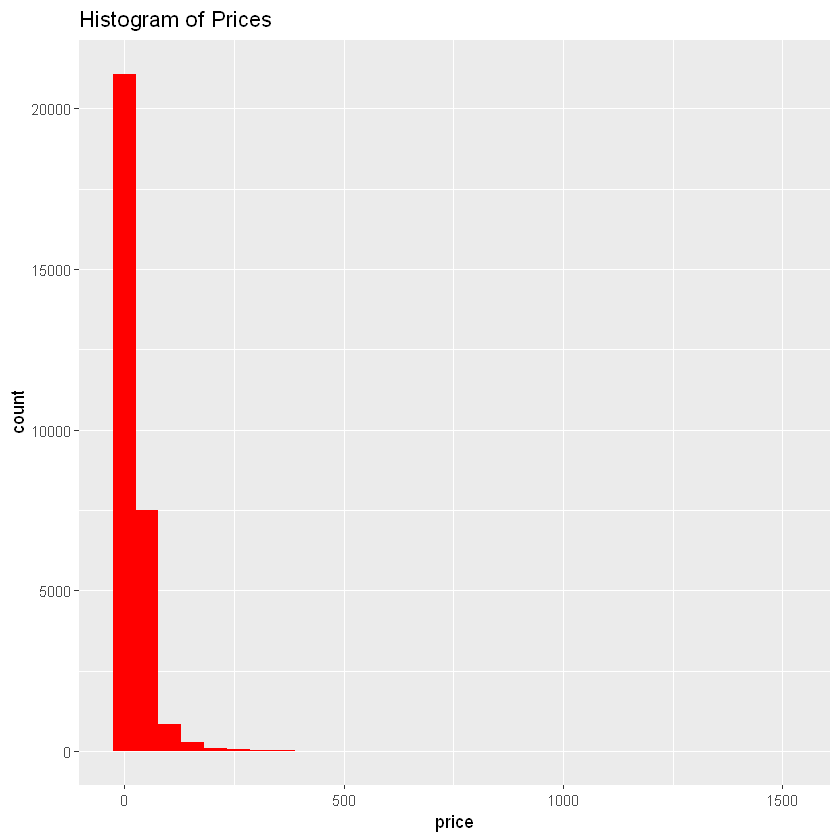

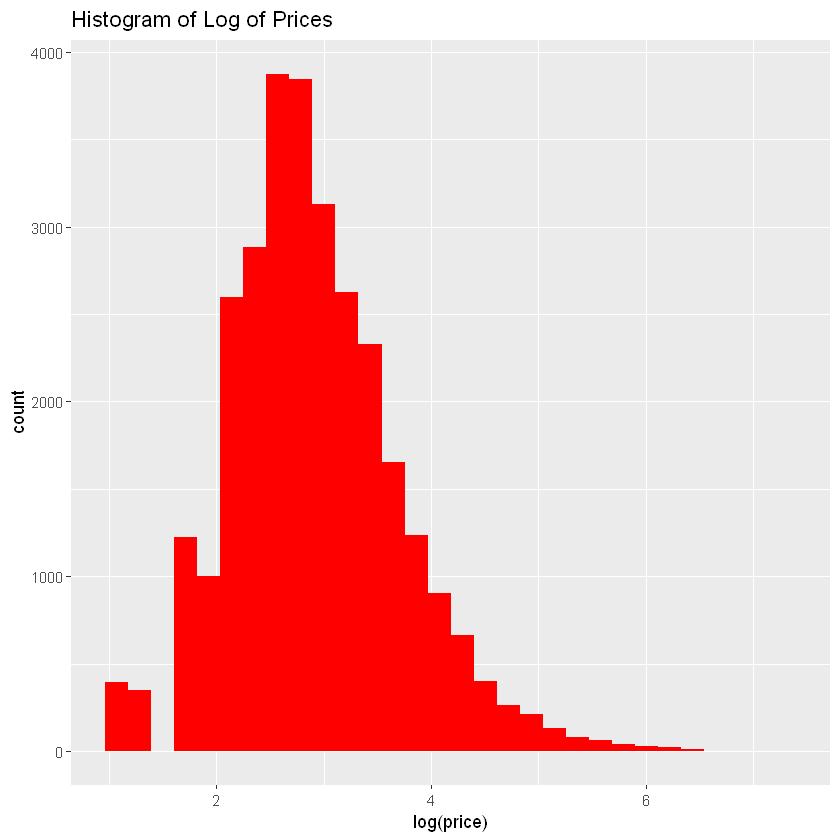

In [ ]:
# Histogram of Price
ggplot(data=train_df,aes(x=price)) + 
  geom_histogram(fill='red') + 
  labs(title='Histogram of Prices')

ggplot(data=train_df,aes(x=log(price))) + 
  geom_histogram(fill='red') + 
  labs(title='Histogram of Log of Prices')


## Bivariate Analysis 

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

 Price vs
 
 1. item_condition_id 
 2. category_name
 3. brand_name
 4. shipping

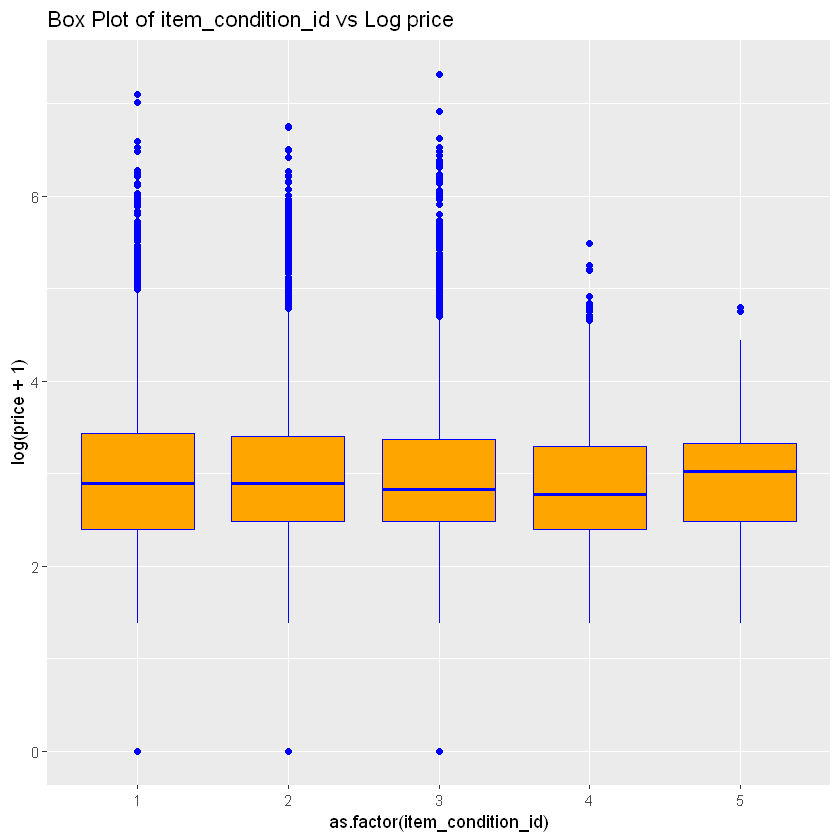

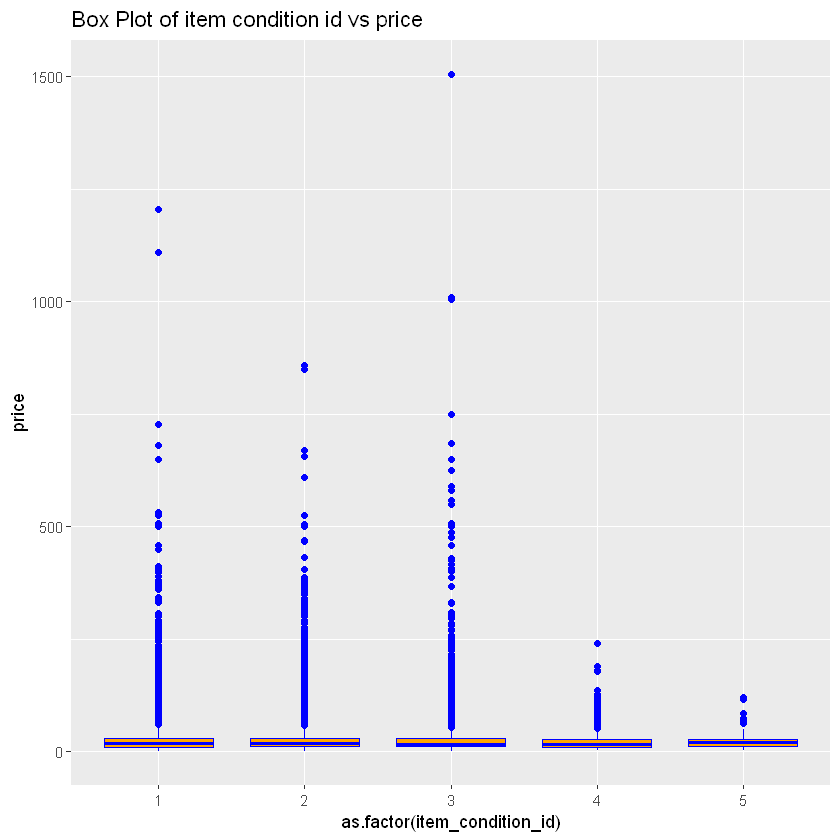

In [ ]:
# Box Plot of Item vs Price
ggplot(data=train_df,aes(x=as.factor(item_condition_id),y=log(price+1))) +
  geom_boxplot(fill='orange',color='blue') + 
  labs(title='Box Plot of item_condition_id vs Log price')

ggplot(data=train_df,aes(x=as.factor(item_condition_id),y=price)) +
  geom_boxplot(fill='orange',color='blue')  + 
  labs(title='Box Plot of item condition id vs price')

# Anova

In [ ]:
#Anova between price and shipping

one.way <- aov(shipping ~ price, data = train_df)
summary(one.way)

               Df Sum Sq Mean Sq F value Pr(>F)    
price           1     73   72.54   296.3 <2e-16 ***
Residuals   29997   7345    0.24                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

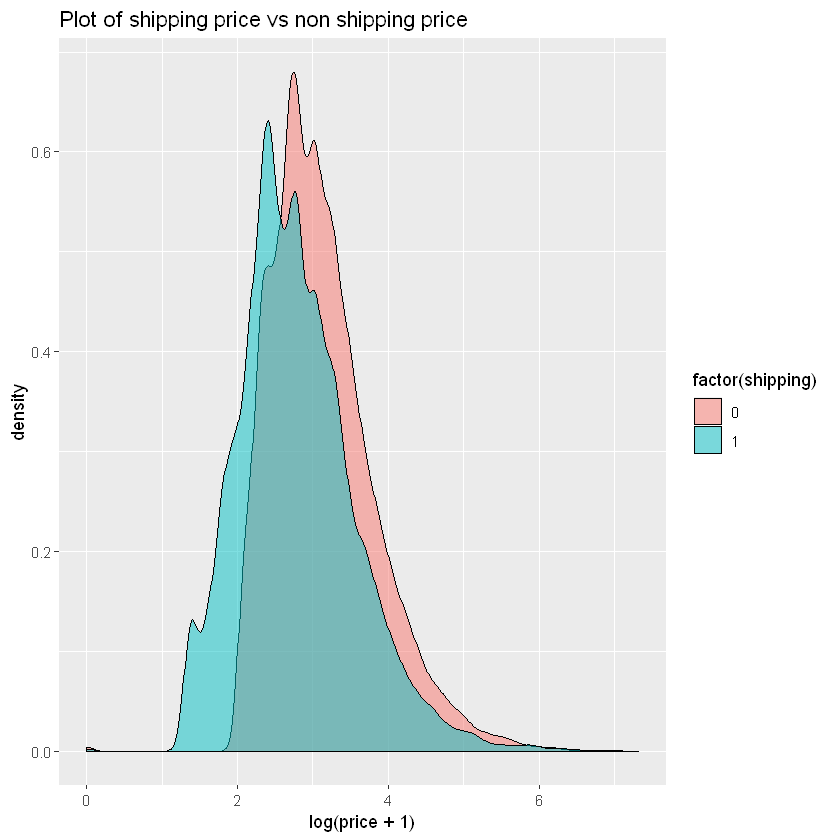

In [ ]:
# Density graph of shipping vs price
train_df %>%
  ggplot(aes(x=log(price+1),fill=factor(shipping))) +
  geom_density(alpha=0.5) + 
  labs(title='Plot of shipping price vs non shipping price')

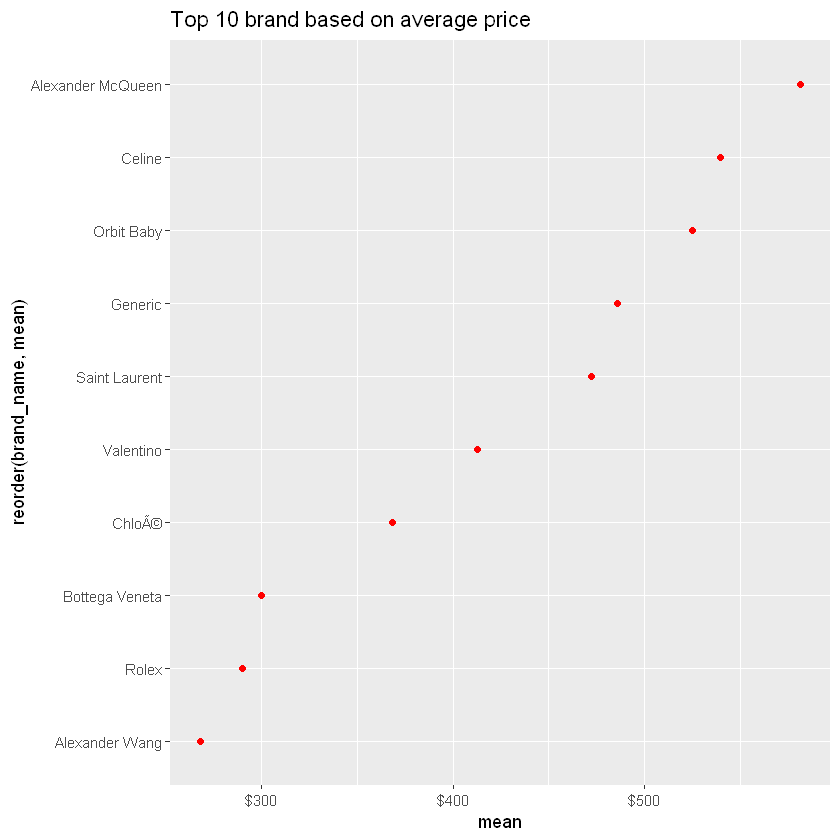

In [ ]:
# Top 10 Brand based on averge and median Price
data = ddply(train_df, .(brand_name), summarize, "mean"= mean(price), "median" = median(price))  
data %>% arrange(desc(mean)) %>% head(10)  %>%
  ggplot(aes(x= reorder(brand_name,mean),y=mean)) +
  geom_point(color='red') +
  coord_flip() +
  scale_y_continuous(labels = scales::dollar) + 
  labs(title='Top 10 brand based on average price')



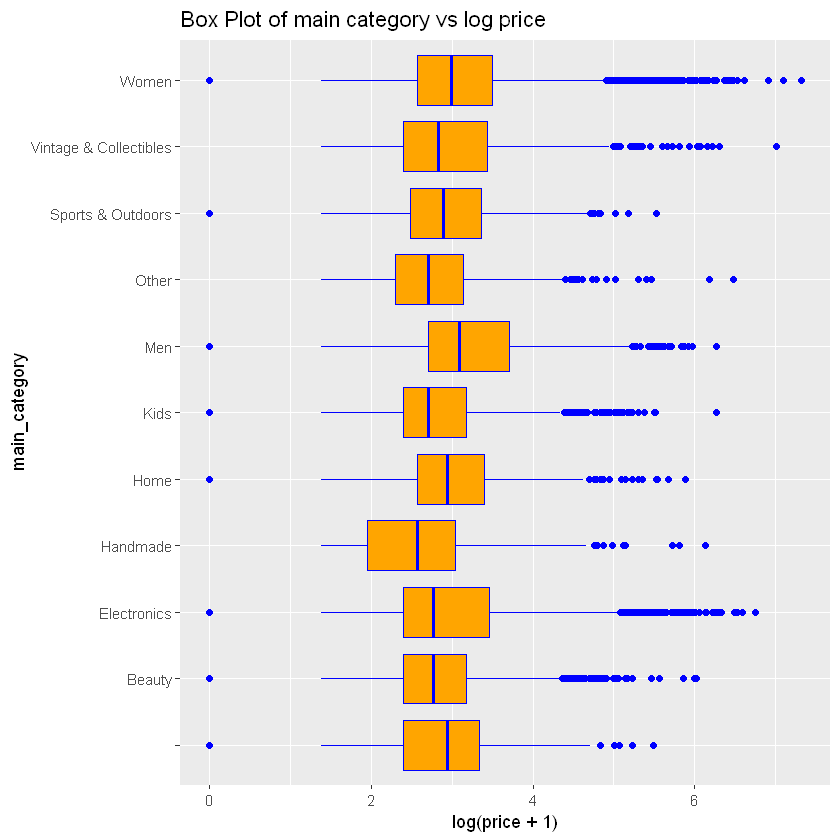

In [ ]:
# Box Plot of Category vs price
train_df %>% 
    separate(category_name, c("main_category", "subcat_1", "subcat_2"), sep="/") %>% ggplot(aes(x=main_category,y=log(price+1))) +
    geom_boxplot(fill='orange',color = 'blue') +
    coord_flip()  + 
    labs(title='Box Plot of main category vs log price')

# Data Manipulation

* Data manipulation is a key feature for data science pipeline. You have to be able to deal with the data in the way you need it to use data properly and turn it into valuable information such as analyzing text data, consumer behavior, and doing trend analysis. 
    * Consistent data
    * Delete or neglect redundant data
    * Overall, being able to convert, update, delete, and incorporate data into a database means you can do more with the data.       Create more value from the data. It becomes pointless by providing data that remains static. 

In [ ]:
train_df = head(train_df,500)

## Handling Null Values

* A NULL value indicates that a data value does not exist in the database. In other words, it is just to denote values that are missing or that we do not know. NULL can be confusing and cumbersome at first. But it is imperative for any analyst to know how to handle them. After data analysis we came up with sutable values to replace the NULL values like,
    * For brand name we used unknown brand 
    * For category name we used other category
    * For description we used no description 

In [ ]:
# Replace brand_name column null with "unknown brand"

train_df['brand_name'][train_df['brand_name'] == ""] <- "Unknown brand"
train_df['brand_name'] = na.fill(train_df['brand_name'], "Unknown brand")

# Replace category_name null with "Other"

train_df['category_name'][train_df['category_name'] == ""] <- "Other/Other/Other"
train_df['category_name'] = na.fill(train_df['category_name'], "Other/Other/Other")

# Replace item_description null with "No description"

train_df['item_description'][train_df['item_description'] == ""] <- "No description"
train_df['item_description'] = na.fill(train_df['item_description'], "No description")

In [ ]:
head(train_df)

train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown brand,10,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,Unknown brand,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown brand,44,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Women/Other/Other,Unknown brand,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top."


## Seperating category name

In [ ]:
# Lets seperate category variable into 3 categories 

category_name = train_df$category_name
train_df = train_df  %>% separate(category_name, c("main_category", "subcat_1", "subcat_2"), sep="/")
train_df$category_name = category_name

In [ ]:
head(train_df)

train_id,name,item_condition_id,main_category,subcat_1,subcat_2,brand_name,price,shipping,item_description,category_name
0,MLB Cincinnati Reds T Shirt Size XL,3,Men,Tops,T-shirts,Unknown brand,10,1,No description yet,Men/Tops/T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics/Computers & Tablets/Components & Parts
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women/Tops & Blouses/Blouse
3,Leather Horse Statues,1,Home,Home DÃ©cor,Home DÃ©cor Accents,Unknown brand,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home/Home DÃ©cor/Home DÃ©cor Accents
4,24K GOLD plated rose,1,Women,Jewelry,Necklaces,Unknown brand,44,0,Complete with certificate of authenticity,Women/Jewelry/Necklaces
5,Bundled items requested for Ruie,3,Women,Other,Other,Unknown brand,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women/Other/Other


## Label Encoding

* Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. 
* Machine learning algorithms can then decide in a better way on how those labels must be operated. 
* It is an important pre-processing step for the structured dataset in supervised learning

In [ ]:
#Label enncoding category,brand_name,subcat_1,subcat_2

lbl_main_category <- LabelEncoder$new()
lbl_main_category$fit(train_df$main_category)

lbl_brand_name <- LabelEncoder$new()
lbl_brand_name$fit(train_df$brand_name)

lbl_subcat_1 <- LabelEncoder$new()
lbl_subcat_1$fit(train_df$subcat_1)

lbl_subcat_2 <- LabelEncoder$new()
lbl_subcat_2$fit(train_df$subcat_2)

In [ ]:
train_df$n_main_category <- lbl_main_category$transform(train_df$main_category)
train_df$n_brand_name = lbl_brand_name$transform(train_df$brand_name)
train_df$n_subcat_1 = lbl_subcat_1$transform(train_df$subcat_1)
train_df$n_subcat_2 = lbl_subcat_2$transform(train_df$subcat_2)

In [ ]:
head(train_df)

train_id,name,item_condition_id,main_category,subcat_1,subcat_2,brand_name,price,shipping,item_description,category_name,n_main_category,n_brand_name,n_subcat_1,n_subcat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,Men,Tops,T-shirts,Unknown brand,10,1,No description yet,Men/Tops/T-shirts,0,0,0,0
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics/Computers & Tablets/Components & Parts,1,1,1,1
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women/Tops & Blouses/Blouse,2,2,2,2
3,Leather Horse Statues,1,Home,Home DÃ©cor,Home DÃ©cor Accents,Unknown brand,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home/Home DÃ©cor/Home DÃ©cor Accents,3,0,3,3
4,24K GOLD plated rose,1,Women,Jewelry,Necklaces,Unknown brand,44,0,Complete with certificate of authenticity,Women/Jewelry/Necklaces,2,0,4,4
5,Bundled items requested for Ruie,3,Women,Other,Other,Unknown brand,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women/Other/Other,2,0,5,5


## Text cleaning - Stemming and Lemmatization for item description

* Replace unwanted symbols
* Convert text lower case
* Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.
* Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

In [ ]:
# Removing the rows which is not having proper description
train_df <- subset(train_df, item_description != "No description yet")


In [ ]:

#reaplce unwanted symbols
train_df$description = str_replace_all(train_df$item_description, "[[:punct:]]", " ")

#Lemmatization
train_df$clean_description = lemmatize_strings(train_df$description)


# Making all the text lower case
train_df$lower_clean_description = tolower(train_df$clean_description)


head(train_df,5)

,train_id,name,item_condition_id,main_category,subcat_1,subcat_2,brand_name,price,shipping,item_description,category_name,n_main_category,n_brand_name,n_subcat_1,n_subcat_2,description,clean_description,lower_clean_description
2,1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Electronics/Computers & Tablets/Components & Parts,1,1,1,1,This keyboard is in great condition and works like it came out of the box All of the ports are tested and work perfectly The lights are customizable via the Razer Synapse app on your PC,This keyboard be in great condition and work like it come out of the box All of the port be test and work perfectly The light be customizable via the Razer Synapse app on your PC,this keyboard be in great condition and work like it come out of the box all of the port be test and work perfectly the light be customizable via the razer synapse app on your pc
3,2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",Women/Tops & Blouses/Blouse,2,2,2,2,Adorable top with a hint of lace and a key hole in the back The pale pink is a 1X and I also have a 3X available in white,Adorable top with a hint of lace and a key hole in the back The pale pink be a 1X and I also have a 3X available in white,adorable top with a hint of lace and a key hole in the back the pale pink be a 1x and i also have a 3x available in white
4,3,Leather Horse Statues,1,Home,Home DÃ©cor,Home DÃ©cor Accents,Unknown brand,35,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Home/Home DÃ©cor/Home DÃ©cor Accents,3,0,3,3,New with tags Leather horses Retail for rm each Stand about a foot high They are being sold as a pair Any questions please ask Free shipping Just got out of storage,New with tag Leather horse Retail for rm each Stand about a foot high They be be sell as a pair Any question please ask Free ship Just get out of storage,new with tag leather horse retail for rm each stand about a foot high they be be sell as a pair any question please ask free ship just get out of storage
5,4,24K GOLD plated rose,1,Women,Jewelry,Necklaces,Unknown brand,44,0,Complete with certificate of authenticity,Women/Jewelry/Necklaces,2,0,4,4,Complete with certificate of authenticity,Complete with certificate of authenticity,complete with certificate of authenticity
6,5,Bundled items requested for Ruie,3,Women,Other,Other,Unknown brand,59,0,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Women/Other/Other,2,0,5,5,Banana republic bottoms Candies skirt with matching blazer Amy Byers suit Loft bottoms and cami top,Banana republic bottom candy skirt with match blazer Amy Byers suit Loft bottom and cami top,banana republic bottom candy skirt with match blazer amy byers suit loft bottom and cami top


# Feature Engineering

* What is Feature engineering?
* What are various ways?
* What is tf idf? and why?

![image.png](attachment:image.png)

* Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Feature engineering turn your inputs into things the algorithm can understand.


* Vaious Types are,
    * N Gram 
    * Countvectorizer 
    * TFIDF
    * GloVe
    * Word embeddings
    * Transformers etc.

## Countvectorizer

Countvectorizer : CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

![image-2.png](attachment:image-2.png)

In [ ]:
cv <- CountVectorizer$new(min_df = 0.7, max_features = 5000, remove_stopwords = TRUE)
Sys.time()
cv$fit(train_df$lower_clean_description)
Sys.time()

cv_features = cv$transform(train_df$lower_clean_description)

[1] "2021-04-26 18:49:38 IST"

[1] "2021-04-26 18:50:30 IST"

In [ ]:
cv_df = train_df[ , c('item_condition_id', 'n_main_category', 'n_subcat_1', 'n_subcat_2', 'n_brand_name', 'price', 'shipping')]

colnames(cv_df) <- c('item_condition_id', 'n_main_category', 'n_subcat_1', 'n_subcat_2', 'n_brand_name', 'n_price', 'n_shipping')

cv_df = cbind(cv_df,data.frame(cv_features))
cv_df = data.frame(lapply(cv_df, as.integer))

In [ ]:
head(cv_df)

item_condition_id,n_main_category,n_subcat_1,n_subcat_2,n_brand_name,n_price,n_shipping,new,size,ship,...,yellowish,yet,yoga,younique,youth,youthcleanse,ysl,zag,zenith,zirconium
3,1,1,1,1,52,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,3,0,35,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,4,4,0,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,5,5,0,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,6,6,3,64,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# TFIDF

TF-IDF 

It is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is         done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the         word across a set of documents.
    
It enables us to gives us a way to associate each word in a document with a number that represents how relevant each word     is in that document. Then, documents with similar, relevant words will have similar vectors, which is what we are looking       for in a machine learning algorithm.
    
![image-2.png](attachment:image-2.png)

In [ ]:
tf <- TfIdfVectorizer$new(min_df = 0.7, max_features = 5000, remove_stopwords = TRUE)

Sys.time()
tf$fit(train_df$lower_clean_description)
Sys.time()

tf_features = tf$transform(train_df$lower_clean_description)

[1] "2021-04-26 18:52:54 IST"

[1] "2021-04-26 18:53:50 IST"

In [ ]:
tf_df = train_df[ , c('item_condition_id', 'n_main_category', 'n_subcat_1', 'n_subcat_2', 'n_brand_name', 'price', 'shipping')]

colnames(tf_df) <- c('item_condition_id', 'n_main_category', 'n_subcat_1', 'n_subcat_2', 'n_brand_name', 'n_price', 'n_shipping')

tf_df = cbind(tf_df,data.frame(tf_features))
tf_df = data.frame(lapply(tf_df, as.integer))

In [ ]:
head(tf_df)

item_condition_id,n_main_category,n_subcat_1,n_subcat_2,n_brand_name,n_price,n_shipping,new,size,ship,...,yellowish,yet,yoga,younique,youth,youthcleanse,ysl,zag,zenith,zirconium
3,1,1,1,1,52,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,3,0,35,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,4,4,0,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,5,5,0,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,6,6,3,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Model

## Metrics


* MAE - Mean Absolute Error is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.

![image.png](attachment:image.png)

* MAPE -  Mean Absolute Percentage Error is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning. It usually expresses the accuracy as a ratio.


* MSE - The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value. Then you add up all those values for all data points, and, in the case of a fit with two parameters such as a linear fit, divide by the number of points minus two. The squaring is done so negative values do not cancel positive values. The smaller the Mean Squared Error, the closer the fit is to the data. The MSE has the units squared of whatever is plotted on the vertical axis.

![image-2.png](attachment:image-2.png)

* RMSE -Root Mean Squared Error is just the square root of the mean square error.

## Decision Trees

Decision tree is a graph to represent choices and their results in form of a tree. The nodes in the graph represent an event or choice and the edges of the graph represent the decision rules or conditions.

![image.png](attachment:image.png)

### Decision tree using Countvectorizer

In [ ]:
cv_dt <- rpart(n_price ~ ., data = cv_df) 

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_dt,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_dt,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_dt,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_dt,cv_df))))

[1] "MAE : 17.9338782156399"
[1] "MAPE : 1.08935241784255"
[1] "RMSE : 33.8626009521364"
[1] "MSE : 1146.67574324363"


### Decision tree using TFIDF

In [ ]:
tf_dt <- rpart(n_price ~ ., data = tf_df) 

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_dt,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_dt,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_dt,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_dt,tf_df))))

[1] "MAE : 19.6178684424176"
[1] "MAPE : 1.13084868821128"
[1] "RMSE : 36.9763967221726"
[1] "MSE : 1367.2539145555"


## Random Forest

Disadvantages of decision trees:

1. They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.
2. They are often relatively inaccurate.
3. Tree splitting is locally greedy 
4. Over Fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.


### Explanation

* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees

![image-2.png](attachment:image-2.png)

### Random forest model with Countvectorizer

In [ ]:
# Build the model with 50 trees

cv_rf <- randomForest(n_price ~ ., data = cv_df, mtry = 10, importance = TRUE) 

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_rf,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_rf,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_rf,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_rf,cv_df))))

[1] "MAE : 14.2102725075602"
[1] "MAPE : 0.86099524749095"
[1] "RMSE : 26.0911152838782"
[1] "MSE : 680.746296756622"


In [ ]:
# Build the model with 100 trees

cv_rf <- randomForest(n_price ~ ., data = cv_df, mtry = 100, importance = TRUE) 

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_rf,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_rf,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_rf,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_rf,cv_df))))

[1] "MAE : 8.39384814838338"
[1] "MAPE : 0.452269410246328"
[1] "RMSE : 17.7882744978559"
[1] "MSE : 316.422709611071"


### Random forest model with TFIDF

In [ ]:
# Build the model with 10 trees

tf_rf <- randomForest(n_price ~ ., data = tf_df, mtry = 10, importance = TRUE) 

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_rf,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_rf,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_rf,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_rf,tf_df))))

[1] "MAE : 20.570754780683"
[1] "MAPE : 1.24981400270831"
[1] "RMSE : 39.2499531098377"
[1] "MSE : 1540.55881912446"


In [ ]:
# Build the model with 100 trees

tf_rf <- randomForest(n_price ~ ., data = tf_df, mtry = 100, importance = TRUE) 

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_rf,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_rf,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_rf,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_rf,tf_df))))

[1] "MAE : 20.4517068439083"
[1] "MAPE : 1.24254389428039"
[1] "RMSE : 38.9911496781802"
[1] "MSE : 1520.30975322626"


# Support Vector Machine

![image.png](attachment:image.png)

* Support-Vector Machines (SVM) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.
* It is one of the most robust prediction methods, being based on statistical learning frameworks.
* It training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.
* It maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

![image.png](attachment:image.png)

### SVM with Countvectorizer

In [ ]:
# Build svm model with linear kernel

cv_svm = svm(formula = n_price ~ .,
                 data = cv_df,
                 kernel = 'linear')

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_svm,cv_df))))

[1] "MAE : 4.18554960127173"
[1] "MAPE : 0.281839705519339"
[1] "RMSE : 5.98974798907317"
[1] "MSE : 35.8770809726061"


In [ ]:
# Build svm model with radial kernel


cv_svm = svm(formula = n_price ~ .,
                 data = cv_df,
                 kernel = 'radial')

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_svm,cv_df))))

[1] "MAE : 9.89243592603115"
[1] "MAPE : 0.362797301951125"
[1] "RMSE : 31.3762096675465"
[1] "MSE : 984.46653310184"


In [ ]:
# Build svm model with poly kernel


cv_svm = svm(formula = n_price ~ .,
                 data = cv_df,
                 kernel = 'poly')

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_svm,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_svm,cv_df))))

[1] "MAE : 10.1995919249375"
[1] "MAPE : 0.480558463654449"
[1] "RMSE : 22.7646234112536"
[1] "MSE : 518.228079056196"


### SVM with TFIDF

In [ ]:
# Build svm model with linear kernel

tf_svm = svm(formula = n_price ~ .,
                 data = tf_df,
                 kernel = 'linear')

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_svm,tf_df))))

[1] "MAE : 16.7079680653355"
[1] "MAPE : 0.565062376930293"
[1] "RMSE : 40.2659785561714"
[1] "MSE : 1621.34902908605"


In [ ]:
# Build svm model with radial kernel


tf_svm = svm(formula = n_price ~ .,
                 data = tf_df,
                 kernel = 'radial')

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_svm,tf_df))))

[1] "MAE : 17.1560770628548"
[1] "MAPE : 0.580655778242189"
[1] "RMSE : 40.8214314460075"
[1] "MSE : 1666.38926530109"


In [ ]:
# Build svm model with poly kernel


tf_svm = svm(formula = n_price ~ .,
                 data = tf_df,
                 kernel = 'poly')

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_svm,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_svm,tf_df))))

[1] "MAE : 17.1349290098726"
[1] "MAPE : 0.59240198683904"
[1] "RMSE : 40.7800616759113"
[1] "MSE : 1663.01343029113"


## Gradient Boosting Machines

Random forests build an ensemble of deep independent trees, GBMs build an ensemble of shallow and weak successive trees with each tree learning and improving on the previous. When combined, these many weak successive trees produce a powerful “committee” that are often hard to beat with other algorithms. 


![image.png](attachment:image.png)

### GBM with Countvectorizer

In [ ]:
cv_gbm = gbm(formula = n_price ~ .,
                 data = cv_df,
          distribution = "gaussian",
          n.trees = 10)

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_gbm,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_gbm,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_gbm,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_gbm,cv_df))))

Using 10 trees...



[1] "MAE : 19.9477031337714"


Using 10 trees...



[1] "MAPE : 1.20132676176362"


Using 10 trees...



[1] "RMSE : 37.9947790204043"


Using 10 trees...



[1] "MSE : 1443.60323280936"


In [ ]:
cv_gbm = gbm(formula = n_price ~ .,
                 data = cv_df,
          distribution = "gaussian",
          n.trees = 50)

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, predict(cv_gbm,cv_df))))
print(paste0("MAPE : " ,mape(cv_df$n_price, predict(cv_gbm,cv_df))))
print(paste0("RMSE : " ,rmse(cv_df$n_price, predict(cv_gbm,cv_df))))
print(paste0("MSE : " ,mse(cv_df$n_price, predict(cv_gbm,cv_df))))

Using 50 trees...



[1] "MAE : 19.408668513367"


Using 50 trees...



[1] "MAPE : 1.14715260254332"


Using 50 trees...



[1] "RMSE : 35.7844792251399"


Using 50 trees...



[1] "MSE : 1280.52895341447"


### GBM with TFIDF

In [ ]:
tf_gbm = gbm(formula = n_price ~ .,
                 data = tf_df,
          distribution = "gaussian",
          n.trees = 10)

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_gbm,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_gbm,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_gbm,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_gbm,tf_df))))

Using 10 trees...



[1] "MAE : 19.9409109591759"


Using 10 trees...



[1] "MAPE : 1.18890476045237"


Using 10 trees...



[1] "RMSE : 38.5943603525744"


Using 10 trees...



[1] "MSE : 1489.52465102437"


In [ ]:
tf_gbm = gbm(formula = n_price ~ .,
                 data = tf_df,
          distribution = "gaussian",
          n.trees = 50)

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, predict(tf_gbm,tf_df))))
print(paste0("MAPE : " ,mape(tf_df$n_price, predict(tf_gbm,tf_df))))
print(paste0("RMSE : " ,rmse(tf_df$n_price, predict(tf_gbm,tf_df))))
print(paste0("MSE : " ,mse(tf_df$n_price, predict(tf_gbm,tf_df))))

Using 50 trees...



[1] "MAE : 19.3170274536426"


Using 50 trees...



[1] "MAPE : 1.10745178130604"


Using 50 trees...



[1] "RMSE : 37.7189491026669"


Using 50 trees...



[1] "MSE : 1422.71912140958"


# Neural Networks

* A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

![image.png](attachment:image.png)

### Neuralnets with Countvectorizer

In [ ]:
#Building neural networks with 3 hidden layers

cv_nn = neuralnet(n_price ~ ., data = cv_df, hidden = 3 , linear.output = T, stepmax=1e+06 )

In [ ]:
print(paste0("MAE : " ,mae(cv_df$n_price, compute(cv_nn,cv_df)$net.result)))
print(paste0("MAPE : " ,mape(cv_df$n_price, compute(cv_nn,cv_df)$net.result)))
print(paste0("RMSE : " ,rmse(cv_df$n_price, compute(cv_nn,cv_df)$net.result)))
print(paste0("MSE : " ,mse(cv_df$n_price, compute(cv_nn,cv_df)$net.result)))

[1] "MAE : 3.79332123304629"
[1] "MAPE : 0.0670548303551218"
[1] "RMSE : 20.9415674152167"
[1] "MSE : 438.549245806064"


### Neuralnets with TFIDF

In [ ]:
#Building neural networks with 3 hidden layers

tf_nn = neuralnet(n_price ~ ., data = tf_df, hidden = 3 , linear.output = T, stepmax=1e+06 )

In [ ]:
print(paste0("MAE : " ,mae(tf_df$n_price, compute(tf_nn,tf_df)$net.result)))
print(paste0("MAPE : " ,mape(tf_df$n_price, compute(tf_nn,tf_df)$net.result)))
print(paste0("RMSE : " ,rmse(tf_df$n_price, compute(tf_nn,tf_df)$net.result)))
print(paste0("MSE : " ,mse(tf_df$n_price, compute(tf_nn,tf_df)$net.result)))

[1] "MAE : 27.13801020205"
[1] "MAPE : 1.61944326612365"
[1] "RMSE : 50.8792708480121"
[1] "MSE : 2588.70020202538"


## Comparison

In [ ]:
cat("TFIDF \n")

data.frame(Test = c("MAE","MAPE","RMSE","MSE"),
           DecisionTree = c(mae(tf_df$n_price, predict(tf_dt,tf_df)),mape(tf_df$n_price, predict(tf_dt,tf_df)),rmse(tf_df$n_price, predict(tf_dt,tf_df)),mse(tf_df$n_price, predict(tf_dt,tf_df))),
           RandomForest = c(mae(tf_df$n_price, predict(tf_rf,tf_df)),mape(tf_df$n_price, predict(tf_rf,tf_df)),rmse(tf_df$n_price, predict(tf_rf,tf_df)),mse(tf_df$n_price, predict(tf_rf,tf_df))),
           SVM = c(mae(tf_df$n_price, predict(tf_svm,tf_df)),mape(tf_df$n_price, predict(tf_svm,tf_df)),rmse(tf_df$n_price, predict(tf_svm,tf_df)),mse(tf_df$n_price, predict(tf_svm,tf_df))),
           nn = c(mae(tf_df$n_price, compute(tf_nn,head(tf_df,1))$net.result),mape(tf_df$n_price, compute(tf_nn,head(tf_df,1))$net.result),rmse(tf_df$n_price, compute(tf_nn,head(tf_df,1))$net.result),mse(tf_df$n_price, compute(tf_nn,head(tf_df,1))$net.result))
          )

cat("Countvectorizer \n")

data.frame(Test = c("MAE","MAPE","RMSE","MSE"),
           DecisionTree = c(mae(cv_df$n_price, predict(cv_dt,cv_df)),mape(cv_df$n_price, predict(cv_dt,cv_df)),rmse(cv_df$n_price, predict(cv_dt,cv_df)),mse(cv_df$n_price, predict(cv_dt,cv_df))),
           RandomForest = c(mae(cv_df$n_price, predict(cv_rf,cv_df)),mape(cv_df$n_price, predict(cv_rf,cv_df)),rmse(cv_df$n_price, predict(cv_rf,cv_df)),mse(cv_df$n_price, predict(cv_rf,cv_df))),
           SVM = c(mae(cv_df$n_price, predict(cv_svm,cv_df)),mape(cv_df$n_price, predict(cv_svm,cv_df)),rmse(cv_df$n_price, predict(cv_svm,cv_df)),mse(cv_df$n_price, predict(cv_svm,cv_df))),
           nn = c(mae(cv_df$n_price, compute(cv_nn,(cv_df))$net.result),mape(cv_df$n_price, compute(cv_nn,(cv_df))$net.result),rmse(cv_df$n_price, compute(cv_nn,(cv_df))$net.result),mse(cv_df$n_price, compute(cv_nn,(cv_df))$net.result))
          )

TFIDF 


Test,DecisionTree,RandomForest,SVM,nn
MAE,24.029423,25.122157,22.8379774,27.379424
MAPE,1.263705,1.310475,0.6634245,1.646267
RMSE,47.669837,50.911059,53.7772421,50.936513
MSE,2272.413324,2591.935952,2891.9917638,2594.528315


Countvectorizer 


Test,DecisionTree,RandomForest,SVM,nn
MAE,22.259172,9.8593216,14.1385280,3.79332123
MAPE,1.329011,0.4231876,0.5148806,0.06705483
RMSE,42.481935,22.9029690,31.4078738,20.94156742
MSE,1804.714812,524.5459897,986.4545343,438.54924581


## Other potential models

#### Other feature engineering methods instead of TFIDF : 

    1.GloVe
    2.Word embeddings - Word2vec, fasttext
    3.ELMo
    4.Transformers like BERT, GPT etc.

#### Other Machine learning models :

    1.XGBoost
    2.KNN
    3.DNN and CNN
    4.RNN and LSTM


# R shiny Dashboard 

https://rstudio.github.io/shinydashboard/

In [ ]:
# Build the UI using fluidPage function

ui <- fluidPage(
    
  titlePanel("Product Price Prediction"),
    
  selectInput("item_condition_id", "Item Condition ID", c(train_df$item_condition_id)),
  
  selectInput("shipping", "Shipping", c(train_df$shipping)),
  
  selectInput("main_category", "Main Category", c(train_df$main_category)),
  
  selectInput("subcat_1", "Subcategory 1", c(train_df$subcat_1)),
  
  selectInput("subcat_2", "Subcategory 2", c(train_df$subcat_2)),
  
  selectInput("brand_name", "Brand Name", c(train_df$brand_name)),
    
  textInput("item_description", "Item Description", ""),
    
  actionButton("submit", "Submit"),
  
  verbatimTextOutput("value")
  
)

In [ ]:

server <- function(input, output, session) {
   
  data <- reactive({
            data.frame(item_condition_id = req(input$item_condition_id), n_shipping = req(input$shipping),
               n_main_category = lbl_main_category$transform(req(input$main_category)),
                     n_brand_name = lbl_brand_name$transform(req(input$brand_name)),
                     n_subcat_1 = lbl_subcat_1$transform(req(input$subcat_1)),
                     n_subcat_2 = lbl_subcat_2$transform(req(input$subcat_2)),
                     clean_description = gsub('[[:digit:]]+', '', lemmatize_strings(str_replace_all(req(input$item_description), "[[:punct:]]", " ")))
                     )
      
    })

    tf_features <- reactive({
        manupulated_data = data()
        manupulated_data$clean_description = as.character(manupulated_data$clean_description)
        zz = tryCatch(tf$transform(manupulated_data$clean_description), error=function(e) 0)
        df = cbind(manupulated_data,data.frame(zz))
        df[rownames(rf$importance)[!(rownames(rf$importance) %in% colnames(df))]] = 0
        data.frame(lapply(df[rownames(rf$importance)], as.integer))
        })
    
        
        output$value <- renderText({
            df = tf_features()
            predict(tf_rf,df[rownames(rf$importance)])

        })
        
    
    session$onSessionEnded(function() {
        stopApp()
      })
    
    }

    
    


In [ ]:
shinyApp(ui, server)


Listening on http://127.0.0.1:6319
Warning message:
"Error in data.frame: object 'lbl_main_category' not found"Warning message:
"Error in data.frame: object 'lbl_main_category' not found"

In [ ]:
#Test : This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC